<a href="https://colab.research.google.com/github/Anukriti2001/Anukriti/blob/master/19BDS0068__Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import sympy
from sympy import *
from IPython.core.interactiveshell import InteractiveShell
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
from sklearn.neighbors import KernelDensity
import itertools as it
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import gaussian_kde
from scipy.stats import multivariate_normal
from matplotlib.gridspec import GridSpec
from matplotlib import cm
import math
from scipy.integrate import trapz

In [2]:
InteractiveShell.ast_node_interactivity = "all"
plt.rcParams[ "figure.figsize" ] = (10,10)
origin2D = np.vstack([0,0])
origin3D = np.vstack([0,0,0])
scale = 10

CONSTRUCTION OF PROBABILITY SPACE

In [3]:
d = Symbol('d')
p = Symbol('p')
options = [d,p]
omega = list(it.product(options,repeat=2))
omega

[(d, d), (d, p), (p, d), (p, p)]

In [4]:
X = [(i).count(d) for i in omega]
T = np.unique(X)
X
T

[2, 1, 1, 0]

array([0, 1, 2])

In [5]:
pd = .3
pnd = 1-pd

omegaP = np.vstack([[pd if i == d else pnd for i in np.vstack(omega)[:,0]],[pd if i == d else pnd for i in np.vstack(omega)[:,1]]]).T
omegaP = [i[0]*i[1] for i in omegaP]
omegaP = np.vstack([X,omegaP]).T
omegaP

array([[2.  , 0.09],
       [1.  , 0.21],
       [1.  , 0.21],
       [0.  , 0.49]])

In [6]:
P = lambda x: [i for i in omegaP if x == i[0]] # PMF. For any input value, find probability in event space table.
Ss = T[::-1]
[sum(i)[1] for i in [P(i) for i in Ss]] # Check all values in our target space.

[0.09, 0.42, 0.48999999999999994]

DISCRETE AND COTINUOUS PROBABILITIES

In [60]:
ys = np.linspace(1,3,3)
xs = np.linspace(1,5,5)
xy = np.vstack([(x,y) for x in xs for y in ys])
Matrix(xy[:5])
eventCount = 100
events = xy[np.random.choice(len(xy),100)]
Matrix(events[:5])

Matrix([
[1.0, 1.0],
[1.0, 2.0],
[1.0, 3.0],
[2.0, 1.0],
[2.0, 2.0]])

Matrix([
[3.0, 2.0],
[5.0, 3.0],
[4.0, 3.0],
[5.0, 3.0],
[4.0, 1.0]])

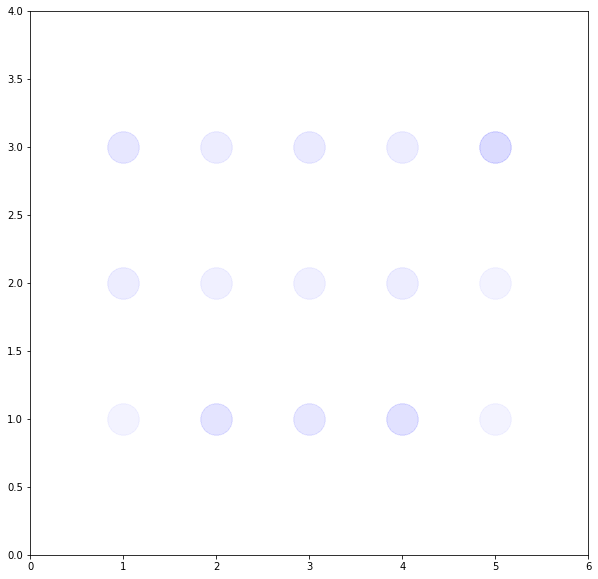

In [8]:
plt.scatter(events[:,0], events[:,1] ,s=1000, alpha = 1/eventCount, c = "b")
plt.axis([0,6,0,4]);

In [10]:
Xevents = np.vstack(np.unique(events[:,0],return_counts=True)).T
Yevents = np.vstack(np.unique(events[:,1],return_counts=True)).T
Xevents = np.hstack([Xevents,np.vstack([i/sum(Xevents[:,1]) for i in Xevents[:,1]])])
Yevents = np.hstack([Yevents,np.vstack([i/sum(Yevents[:,1]) for i in Yevents[:,1]])])
Matrix(Xevents)
Matrix(Yevents)

Matrix([
[1.0, 18.0, 0.18],
[2.0, 20.0,  0.2],
[3.0, 20.0,  0.2],
[4.0, 22.0, 0.22],
[5.0, 20.0,  0.2]])

Matrix([
[1.0, 35.0, 0.35],
[2.0, 26.0, 0.26],
[3.0, 39.0, 0.39]])

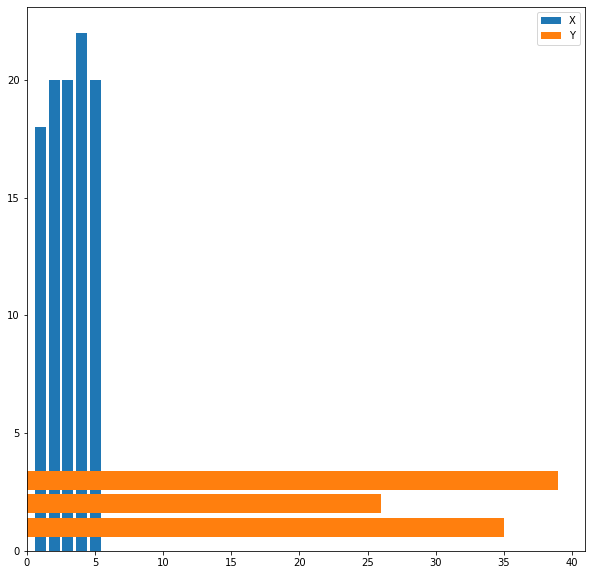

In [67]:
plt.bar(Xevents[:,0],Xevents[:,1],alpha=1,label = "X")
plt.barh(Yevents[:,0],Yevents[:,1],alpha=1,label = "Y")
plt.legend(loc=1);

In [12]:
n = np.random.choice(len(events),1)
n

array([20])

In [13]:
testEvent = events[n]
testEvent

array([[1., 2.]])

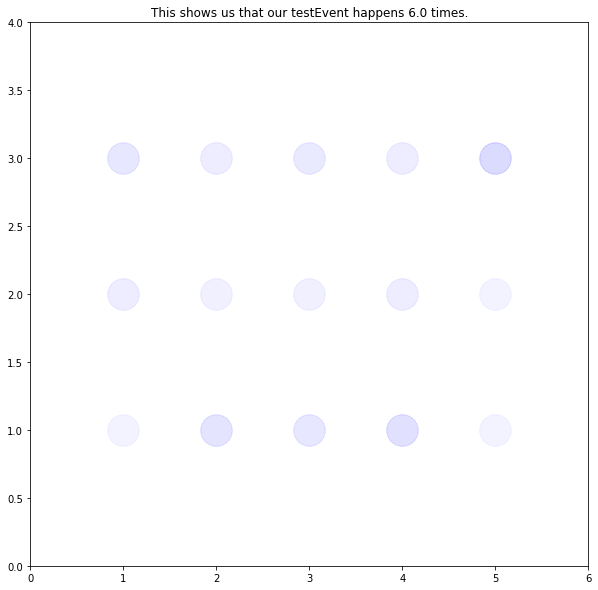

In [14]:
eventOccurances = [i for i in events if (i == testEvent).all()]
plt.scatter(events[:,0], events[:,1] ,s=1000, alpha = 1/eventCount, c = "b")
plt.axis([0,6,0,4])
plt.title(r"This shows us that our testEvent happens %1.1f times." % len(eventOccurances));

In [15]:
# Grabs the X value from our test event and uses it as an index for our Xevents.
columnOccurances = Xevents[int(testEvent[0][0]-1)][1]
columnOccurances
len(eventOccurances)/columnOccurances

18.0

0.3333333333333333

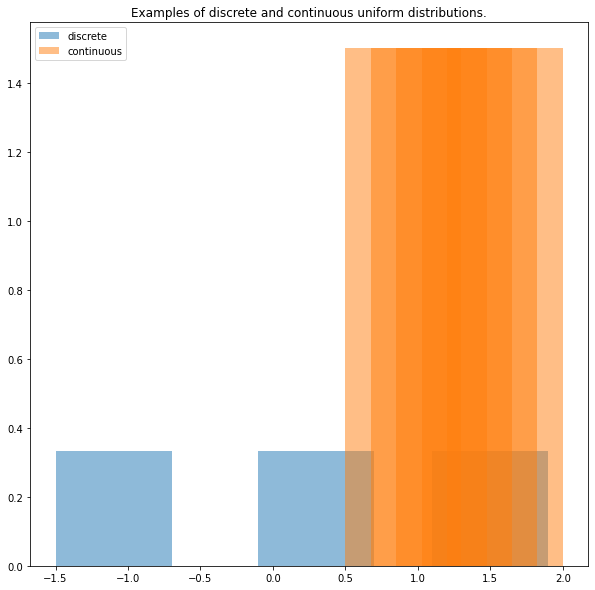

In [68]:
z = [-1.1,.3,1.5]
X = np.linspace(.9,1.6,5)
p = [1/len(z) for i in z]
zp = np.vstack([z,p]).T
plt.bar(zp[:,0],zp[:,1], alpha=.5, label="discrete")
plt.bar(X,np.linspace(1.5,1.5,5), alpha=.5, label = "continuous")
plt.title("Examples of discrete and continuous uniform distributions.")
plt.legend();

SUM RULE, PRODUCT RULE, AND BAYES' THEOREM

In [17]:
As = [1,2,3,4]
pA = [.25,.25,.25,.25]

# Bayes: p(a|b) = p(a)*p(b|a) / p(b)
bayes = lambda pa, pba, pbSum: pa*pba/pbSum

allPa = [.5,.25,.25]
allPb = [.3,.4,.5]

# pb = event of winning =  all events of winning regardless of group, summed up 
# pb = sum of all p(a intersection b) = p(a)*p(b|a)
pbSum = np.dot(allPa,allPb)


# p(a) = .5, event of being in group a
# p(b|a) = .3, event of winning, given that group
bayes(allPa[0],allPb[0],pbSum)

0.39999999999999997

SUMMARY STATISTICS AND INDEPENDENCE

In [18]:
mean1 = np.array([10,2])
mean2 = np.array([0,0])
cov1 = np.vstack([[1,0],[0,1]])
cov2 = np.vstack([[1.7,2.],[2.,8.4]]) # Note, diagonals flipped from book to match figure shape.
Matrix(mean1)
Matrix(cov1)
Matrix(mean2)
Matrix(cov2)

Matrix([
[10],
[ 2]])

Matrix([
[1, 0],
[0, 1]])

Matrix([
[0],
[0]])

Matrix([
[1.7, 2.0],
[2.0, 8.4]])

In [19]:
n = 3000
first = np.round(np.random.multivariate_normal(mean1, cov1, int(n/4))*.4,3) # n/4 to adjust distribution to book figure for countour plot.
second = np.round(np.random.multivariate_normal(mean2, cov2, n)*.6,3)
data = np.vstack([first,second])
np.shape(data)
Matrix(data[:5])

(3750, 2)

Matrix([
[3.873, 1.133],
[4.312, 1.186],
[4.273, 1.151],
[ 4.57, 1.717],
[3.863, 0.648]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sea

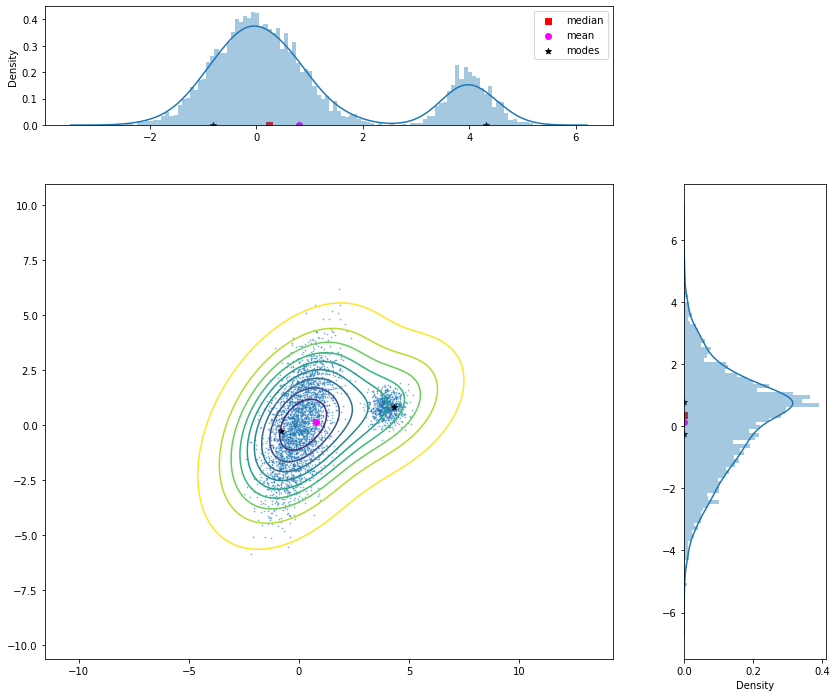

In [20]:
# Figure setup.
fig = plt.figure(figsize=(14, 12))
gs = GridSpec(2, 2, width_ratios=[4, 1], height_ratios=[1, 4])
ax1 = fig.add_subplot(gs[0])
ax3 = fig.add_subplot(gs[2])
ax3.axis('equal')
ax4 = fig.add_subplot(gs[3])
bins = 100
# Figure setup.

# Central scatter plot.
ax3.scatter(data[:,0],data[:,1], s = .5, alpha = .5)
sns.kdeplot(data[:,0], data[:,1],n_levels=10, cmap="viridis_r", ax = ax3, bw = 1)
ax3.scatter(np.mean(data[:,0]),np.mean(data[:,1]), marker = "o", color = "magenta")
ax3.scatter(max(set(first[:,0]), key=list(first[:,0]).count), max(set(first[:,1]), key=list(first[:,1]).count), marker = "*", c = "k")
ax3.scatter(max(set(second[:,0]), key=list(second[:,0]).count), max(set(second[:,1]), key=list(second[:,1]).count), marker = "*", c = "k")
# Central scatter plot.

# X distribution.
sns.distplot(data[:,0], ax = ax1, bins = bins)
ax1.scatter(np.median(data[:,0]),0, label = "median", marker = "s", c = "r")
ax1.scatter(np.mean(data[:,0]), 0, label = "mean", marker = "o", c = "magenta")
ax1.scatter(max(set(first[:,0]), key=list(first[:,0]).count),0, label = "modes", marker = "*", c = "k")
ax1.scatter(max(set(second[:,0]), key=list(second[:,0]).count),0, label="_nolegend_", marker = "*", c = "k")
ax1.legend()
# X distribution.

# Y distribution.
sns.distplot(data[:,1], ax = ax4, vertical = True, bins = bins)
ax4.scatter(0,max(set(first[:,1]), key=list(first[:,1]).count), marker = "*", c = "k")
ax4.scatter(0,max(set(second[:,1]), key=list(second[:,1]).count), marker = "*", c = "k")
ax4.scatter(0, np.mean(data[:,1]), marker = "o", c = "magenta")
ax4.scatter(0,np.median(data[:,1]), marker = "s", c = "r");
# Y distribution.

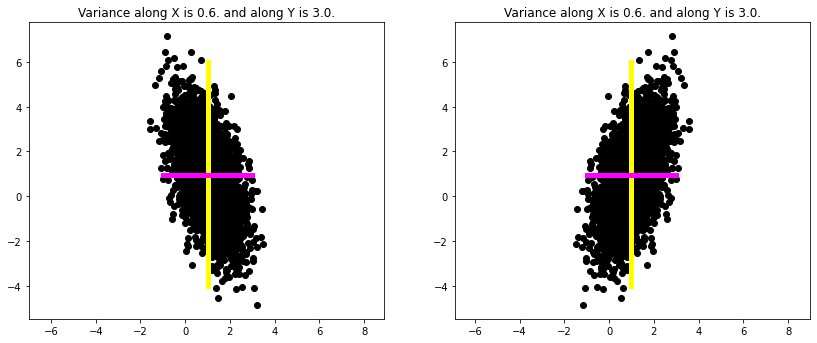

In [21]:
# Data setup.
A = 1+second@np.vstack([[-1,0],[0,1]])
B = 1+second
# Data setup.

# Figure setup.
fig = plt.figure(figsize=(14, 12))
gs = GridSpec(2, 2)
ax1 = fig.add_subplot(gs[0])
ax1.axis("equal")
ax2 = fig.add_subplot(gs[1])
ax2.axis("equal")
# Figure setup.

# Left plot.
ax1.scatter(A[:,0],A[:,1], c = "k")
ax1.plot(np.mean(A[:,0])*np.ones(100),np.linspace(-4,6,100), c = "yellow", lw = 5)
ax1.plot(np.linspace(-1,3,100),np.mean(A[:,1])*np.ones(100), c = "magenta", lw = 5)
ax1.set_title("Variance along X is %1.1f." %np.var(A[:,0]) + " and along Y is %1.1f." %np.var(A[:,1]))

# Right plot.
ax2.scatter(B[:,0],B[:,1], c = "k")
ax2.plot(np.mean(B[:,0])*np.ones(100),np.linspace(-4,6,100), c = "yellow", lw = 5)
ax2.plot(np.linspace(-1,3,100),np.mean(B[:,1])*np.ones(100), c = "magenta", lw = 5)
ax2.set_title("Variance along X is %1.1f." %np.var(B[:,0]) + " and along Y is %1.1f." %np.var(B[:,1]));

In [22]:
"A."
Matrix(np.corrcoef(A[:,0],A[:,1]))
"B."
Matrix(np.corrcoef(B[:,0],B[:,1]))

'A.'

Matrix([
[               1.0, -0.529827696540614],
[-0.529827696540615,                1.0]])

'B.'

Matrix([
[              1.0, 0.529827696540615],
[0.529827696540615,               1.0]])

In [23]:
Matrix(np.cov(A[:,0],A[:,1])/np.sqrt(np.var(A[:,0])*np.var(A[:,1])))
Matrix(np.cov(B[:,0],B[:,1])/np.sqrt(np.var(B[:,0])*np.var(B[:,1])))

Matrix([
[ 0.450220633502437, -0.530004364662168],
[-0.530004364662168,   2.22261470418102]])

Matrix([
[0.450220633502437, 0.530004364662168],
[0.530004364662168,  2.22261470418102]])

In [24]:
np.mean([(i - np.mean(A[:,0]))**2 for i in A[:,0]])
np.mean(A[:,0]**2)-np.mean(A[:,0])**2
(np.sum(A[:,0]**2) /len(A[:,0]) - (np.sum(A[:,0])/len(A[:,0]))**2) #*2 
np.var(A[:,0])

0.5981637979145555

0.5981637979145555

0.5981637979145555

0.5981637979145555

In [25]:
np.mean(A[:,0] + A[:,1]), np.mean(A[:,0]) + np.mean(A[:,1]) # 6.46
np.mean(A[:,0] - A[:,1]), np.mean(A[:,0]) - np.mean(A[:,1]) # 6.47
np.var(A[:,0] + A[:,1])
np.var(A[:,0]) + np.var(A[:,1]) + np.cov(A[:,0], A[:,1]) + np.cov(A[:,1], A[:,0]) # 6.48
np.var(A[:,0] - A[:,1])
np.var(A[:,0]) + np.var(A[:,1]) - np.cov(A[:,0], A[:,1]) - np.cov(A[:,1], A[:,0]) # 6.49

(1.9602606666666667, 1.9602606666666667)

(0.050148000000000005, 0.05014800000000008)

2.142803811386222

array([[7.10345005, 2.14233421],
       [2.14233421, 7.10345005]])

4.959462134762667

array([[-1.18410569e-03,  4.95993173e+00],
       [ 4.95993173e+00, -1.18410569e-03]])

In [26]:
tempX = np.random.standard_normal(100000)
np.mean(tempX)
np.mean(tempX**3)
tempY = tempX**2
tempY

0.001514359177906516

0.006107181624064731

array([0.19555104, 1.02849285, 0.29154175, ..., 0.7493436 , 0.57113612,
       1.51244326])

In [27]:
np.cov(tempX,tempY)[1][0]
np.mean(tempX*tempY) - np.mean(tempX)*np.mean(tempY)
np.mean(tempX**3)

0.00459072105472301

0.004590675147512423

0.006107181624064731

In [28]:
# 6.60
np.sqrt(np.cov(tempX,tempX)) 
np.var(tempX)

array([[1.00071259, 1.00071259],
       [1.00071259, 1.00071259]])

1.0014156653334452

In [29]:
# 6.61
cosAngle = lambda x, y: (np.dot(x.T,y)/np.sqrt(np.dot(np.dot(x.T,x),np.dot(y.T,y))))
angle = lambda cos: np.arccos(cos)*(180/np.pi)
angle(cosAngle(tempX,tempY))
angle((np.cov(tempX,tempY)/np.sqrt(np.var(tempX)*np.var(tempY))))

89.79867764113744

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in arccos
  This is separate from the ipykernel package so we can avoid doing imports until


array([[45.15607236, 89.81478151],
       [89.81478151,         nan]])

In [30]:
A = np.sqrt(np.var(tempX)) # Vector magnitudes.
B = np.sqrt(np.var(tempY))
C = np.sqrt(np.var(tempX+tempY)) 
A,B,C
theta = np.arctan(B)/A # Calculating C direction.
theta, angle(theta)
Cvec = np.dot(npl.norm(C),[np.cos(theta),np.sin(theta)])[::-1]
Cvec

(1.0007075823303455, 1.419099240414391, 1.7390916220179924)

(0.9562647978013421, 17.007828810054377)

array([1.42091376, 1.00271819])

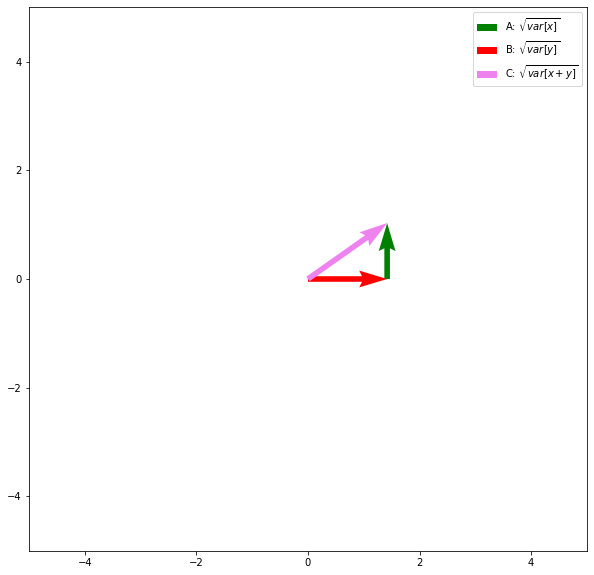

In [31]:
scale = 10
plt.quiver(*[B,0],*[0,A], scale = scale, width = .01,  color = "green", label = r"A: $\sqrt{var[x]}$")
plt.quiver(B,0, scale = scale, width = .01, color = "red", label = r"B: $\sqrt{var[y]}$")
plt.quiver(*[0,0],*Cvec, scale = scale, width = .01,  color = "violet", label = r"C: $\sqrt{var[x+y]}$")
plt.axis([-scale/2,scale/2,-scale/2,scale/2])
plt.legend();

GAUSSIAN DISTRIBUTION

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


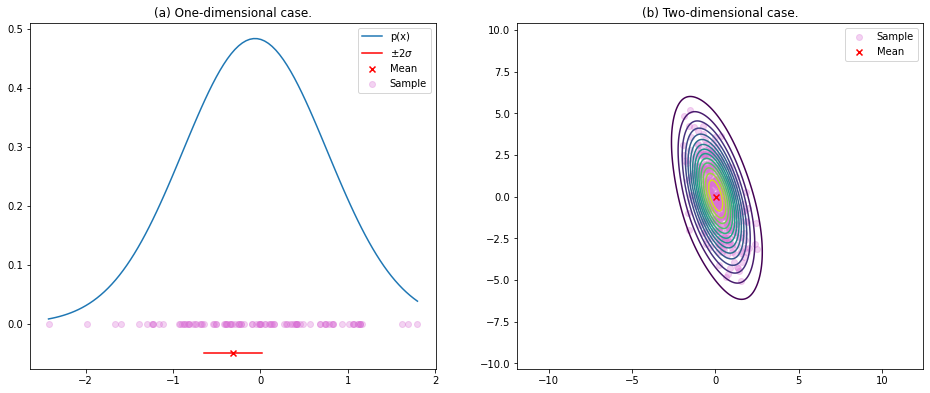

In [32]:
n = 100
# currData = first[:n][:,0] # Toggle to see a density plot with sigmas more similar to the book.
currData = second[:n][:,0]
dataM = np.mean(currData)
dataSTD = np.std(currData)

# Figure setup.
fig = plt.figure(figsize=(16, 14)); gs = GridSpec(2, 2)
ax1 = fig.add_subplot(gs[0])#; ax1.axis("equal")
ax2 = fig.add_subplot(gs[1]); ax2.axis("equal")
ax1.set_title("(a) One-dimensional case.")
ax2.set_title("(b) Two-dimensional case.")
# Figure setup.

# First plot.
temp = np.linspace(np.min(currData),np.max(currData),n)
gauss = lambda x,m,t: (1/(np.sqrt(2*np.pi*t**2)))*np.exp(-(x-m)**2/(2*t**2))
gVals = [gauss(x,dataM,dataSTD) for x in temp]
ax1.plot(temp,gVals) # Distribution.
ax1.scatter(np.mean(temp),-.05,marker = "x", c = "r") # Mean.
ax1.scatter(currData,np.zeros(len(currData)), alpha = .3, c = "orchid") # Sample.
ax1.plot(np.linspace(np.mean(temp)-2*np.std(gVals),np.mean(temp)+2*np.std(gVals),10),
            np.linspace(-.05,-.05,10), c = "r") # 2 Sigma.
ax1.legend(["p(x)", r"$\pm 2\sigma$", "Mean","Sample"])

# Second plot.
n = 500
currData = second[:n]@np.vstack([[-1,0],[0,1]])
ax2.scatter(currData[:,0],currData[:,1], c = "orchid", alpha = .3, label = "Sample")
ax2.scatter(np.mean(currData[:,0]), np.mean(currData[:,1]), marker = "x", c = "r", label = "Mean")
sns.kdeplot(currData[:,0], currData[:,1],n_levels=15, cmap="viridis", bw = 1, ax = ax2)
ax2.axis('equal')
ax2.legend();


In [33]:
# Constructing mean and covariance matrices.
currData = second[:n]@np.vstack([[-1,0],[0,1]])
meanX = np.mean(currData[:,0])
meanY = np.mean(currData[:,1])
mean = np.array([meanX,meanY])
cov = np.cov(currData.T)
mean
cov

array([ 0.050714, -0.039916])

array([[ 0.62166234, -0.76380373],
       [-0.76380373,  3.06384812]])

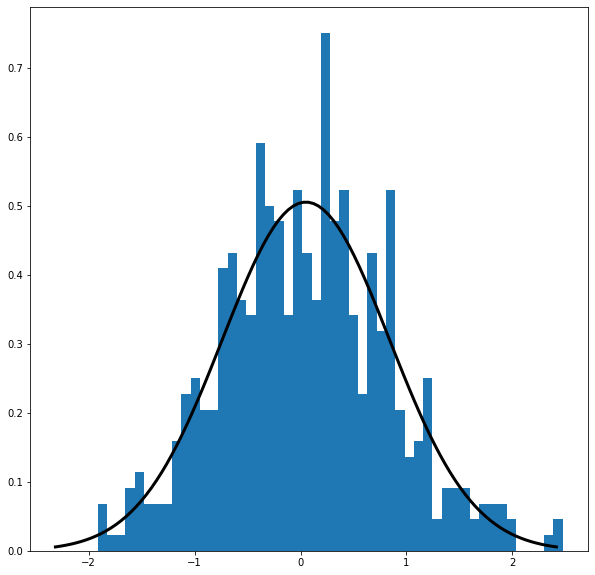

In [34]:
plt.hist(currData[:,0], int(currData[:,0].size/10), density = True)
x = np.linspace(meanX - 3*np.sqrt(cov[:,0][0]), meanX + 3*np.sqrt(cov[:,0][0]), 100)
plt.plot(x,stats.norm.pdf(x,meanX,np.sqrt(cov[:,0][0])), c = "k", lw = 3);

In [36]:
def multivarGauss(pos, m, S):
    D = np.shape(m)[0]
    Sdeterminant = npl.det(S)
    Den = np.sqrt((2*np.pi)**D*Sdeterminant)
    
    Sinv = npl.inv(S)
    exp = np.einsum('...k,kl,...l->...', pos-m, Sinv, pos-m) 
    return np.exp((-1/2)*exp) / Den

# Constructing 3D density data.
scale3D = 7
linspace = np.linspace(-scale3D,scale3D,n) 
X,Y = np.meshgrid(linspace,linspace)
pos = np.empty(X.shape+(2,))
pos[:,:,0] = X
pos[:,:,1] = Y
Z = multivarGauss(pos,mean,cov)
np.shape(Z)

(500, 500)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


TypeError: ignored

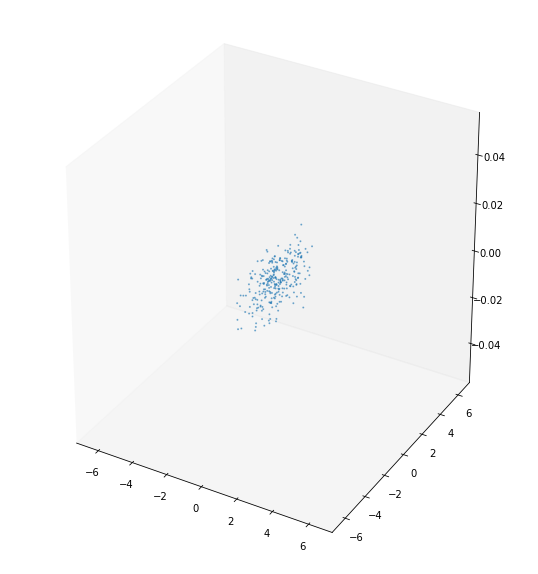

In [58]:
# Figure setup.
fig = plt.figure(figsize = (15,16), tight_layout = True)
gs = GridSpec(2, 2)
ax = fig.add_subplot(gs[1,0], projection='3d')
ax.set_xlim3d(-scale3D,scale3D); ax.set_ylim3d(-scale3D,scale3D); ax.grid(b=None)
n = 300
# Figure setup.

# Scatter and contour plot.
ax.scatter(currData[:n][:,0],currData[:n][:,1],np.zeros(n), alpha = .5, s = 1)
sns.kdeplot(currData[:,0], currData[:,1],n_levels=15, cmap="viridis", bw = 1)
ax.scatter(np.mean(currData[:,0]), np.mean(currData[:,1]), marker = "x", c = "r") # Mean.
# Scatter and contour plot.

# Distributions on walls.
x = np.linspace(meanX - 3*np.sqrt(cov[:,0][0]), meanX + 3*np.sqrt(cov[:,0][0]), 100)
ax.plot(x,np.ones(x.size)*scale3D,stats.norm.pdf(x,meanX,np.sqrt(cov[:,0][0])), c = "k", lw = .5);
x = np.linspace(meanY - 3*np.sqrt(cov[:,1][1]), meanY + 3*np.sqrt(cov[:,1][1]), 100)
ax.plot(np.ones(x.size)*-scale3D,x,stats.norm.pdf(x,meanY,np.sqrt(cov[:,1][1])), c = "k", lw = .5);
# Distributions on walls.

# Histograms on walls.
# *Built using bar plots for 3D projection.
hist, bins = np.histogram(currData[:n][:,1], density = True, bins = 40) 
xs = (bins[:-1] + bins[1:])/2
ax.bar(xs,hist,zs = -scale3D, zdir = "x", width = .001, color = "k", ec = "k", alpha = .3)
hist, bins = np.histogram(currData[:n][:,0], density = True, bins = 40)
xs = (bins[:-1] + bins[1:])/2
ax.bar(xs,hist,zs = scale3D, zdir = "y", width = .001, color = "k", ec = "k", alpha = .3);
# Histograms on walls.

# Scatter and surface plot.
ax = fig.add_subplot(gs[0,:], projection='3d')
ax.set_xlabel(r"$x_1$"); ax.set_ylabel(r"$x_2$"); ax.set_zlabel(r"$p(x_1,x_2)$")
ax.set_xlim3d(-scale3D,scale3D); ax.set_ylim3d(-scale3D,scale3D); ax.grid(b=None)
ax.scatter(currData[:n][:,0],currData[:n][:,1],np.zeros(n), alpha = .5, s = 1)
ax.plot_wireframe(X, Y, Z, color = 'grey') ;  
ax.scatter(np.mean(currData[:,0]), np.mean(currData[:,1]), marker = "x", c = "r") # Mean.
# Scatter and surface plot.

# Scatter plot, mean, surface plot.
ax = fig.add_subplot(gs[1,1], projection='3d')
ax.set_xlim3d(-scale3D,scale3D); ax.set_ylim3d(-scale3D,scale3D); ax.grid(b=None)
ax.scatter(currData[:n][:,0],currData[:n][:,1],np.zeros(n), alpha = .5, s = 1)
ax.contour3D(X,Y,Z, levels = 100, alpha = .2)
ax.scatter(np.mean(currData[:,0]), np.mean(currData[:,1]), marker = "x", c = "r"); # Mean.
# Scatter plot, mean, surface plot.

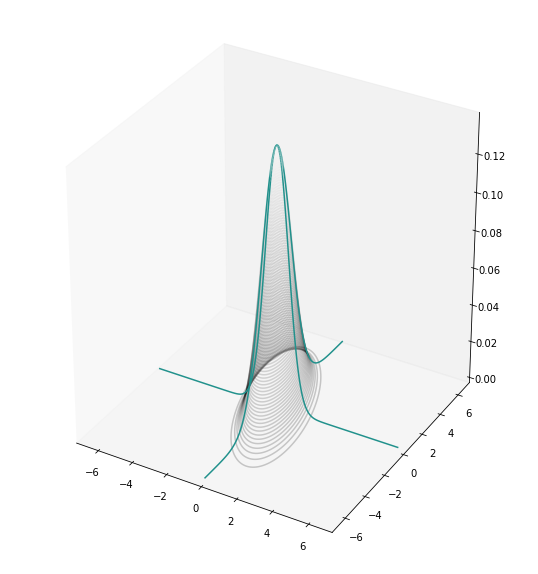

In [38]:
# Contours along x and y axis.
fig = plt.figure(figsize = (15,16), tight_layout = True)
ax = fig.add_subplot(gs[1,0], projection='3d')
scale3D = 7
ax.set_xlim3d(-scale3D,scale3D); ax.set_ylim3d(-scale3D,scale3D); ax.grid(b=None)

ax.contour3D(X,Y,Z, levels = 100, alpha = .2, cmap = "binary_r")
ax.contour(X,Y,Z, levels = 1, zdir='x')
ax.contour(X,Y,Z, levels = 1, zdir='y');

In [39]:
npl.inv(np.cov(currData[:,1],currData[:,1]))

LinAlgError: ignored

In [40]:
np.var(currData[:,1])**-1

0.3270410182534848

In [41]:
# 6.66
muXgivenY = lambda X,Y,ypoint: np.mean(X) + np.cov(X,Y)*np.var(Y)**-1*(ypoint-np.mean(Y))
muXgivenY(currData[:,0],currData[:,1],0)

array([[0.05882929, 0.04074318],
       [0.04074318, 0.09070999]])

In [42]:
# 6.67
covXgivenY = lambda X,Y: np.cov(X,X) - np.cov(X,Y)*np.var(Y)**-1*np.cov(Y,X)
covXgivenY(currData[:,0],currData[:,1])

array([[-0.00124582,  0.43086787],
       [ 0.43086787, -0.00124582]])

In [43]:
mean = np.array([0,2])
cov = np.vstack([[.3,-1.],[-1.,5.]])
Matrix(mean)
Matrix(cov)

Matrix([
[0],
[2]])

Matrix([
[ 0.3, -1.0],
[-1.0,  5.0]])

In [44]:
# Constructing 3D density data.
scale3D = 7
linspace = np.linspace(-scale3D,scale3D,n) 
X,Y = np.meshgrid(linspace,linspace)
pos = np.empty(X.shape+(2,))
pos[:,:,0] = X
pos[:,:,1] = Y
Z = multivarGauss(pos,mean,cov)
np.shape(Z)

(300, 300)

In [45]:
Matrix(mean)
Matrix(cov)

Matrix([
[0],
[2]])

Matrix([
[ 0.3, -1.0],
[-1.0,  5.0]])

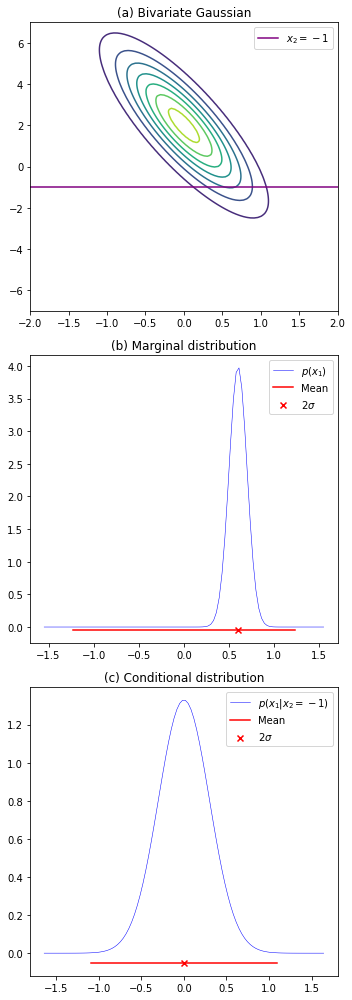

In [46]:
# Figure setup.
fig = plt.figure(figsize = (5,14), tight_layout = True)
gs = GridSpec(2, 2)
ax = fig.add_subplot(3,1,1)
ax.set_title("(a) Bivariate Gaussian")
n = 300
# Figure setup.

# Contour plot.
ax.contour(X,Y,Z)
ax.plot(np.linspace(-2,2,10),np.linspace(-1,-1,10),c = 'purple', label = r"$x_2 = -1$")
ax.set_xlim(-2,2); ax.set_ylim(-scale3D,scale3D)
ax.legend()
# Contour plot.

# Scatter and surface plot.
mu = .6
var = .1
x = np.linspace(-(mu+np.sqrt(var)*3),mu+np.sqrt(var)*3, 100)
ys = stats.norm.pdf(x,mu,var)

ax = fig.add_subplot(3,1,2)
ax.plot(x,ys, c = "b", lw = .5)
ax.scatter(mu, -0.05, marker = "x", c = "r") # Mean.
ax.plot(np.linspace(-(mu+np.sqrt(var)*2),mu+np.sqrt(var)*2,10),
            np.linspace(-.05,-.05,10), c = "r") # 2 Sigma.
ax.set_title("(b) Marginal distribution")
ax.legend([r"$p(x_1)$","Mean",r"$2\sigma$"])
# Scatter and surface plot.

# Scatter plot, mean, surface plot.
mu = 0
var = .3
x = np.linspace(mu-np.sqrt(var)*3, mu+np.sqrt(var)*3, 100)
ys = stats.norm.pdf(x,mu,var)

ax = fig.add_subplot(3,1,3)
ax.plot(x,ys, c = "b", lw = .5)
ax.scatter(mu, -0.05, marker = "x", c = "r") # Mean.
ax.plot(np.linspace(-(mu+np.sqrt(var)*2),(mu+np.sqrt(var)*2),10),
            np.linspace(-.05,-.05,10), c = "r") # 2 Sigma.
ax.set_title("(c) Conditional distribution")
ax.legend([r"$p(x_1|x_2=-1)$","Mean",r"$2\sigma$"]);
# Scatter plot, mean, surface plot.

BINOMIAL DISTRIBUTION

In [47]:
from scipy.stats import binom

In [48]:
means = np.vstack([.1,.4,.75])
N = 15
N
Matrix(means)

15

Matrix([
[ 0.1],
[ 0.4],
[0.75]])

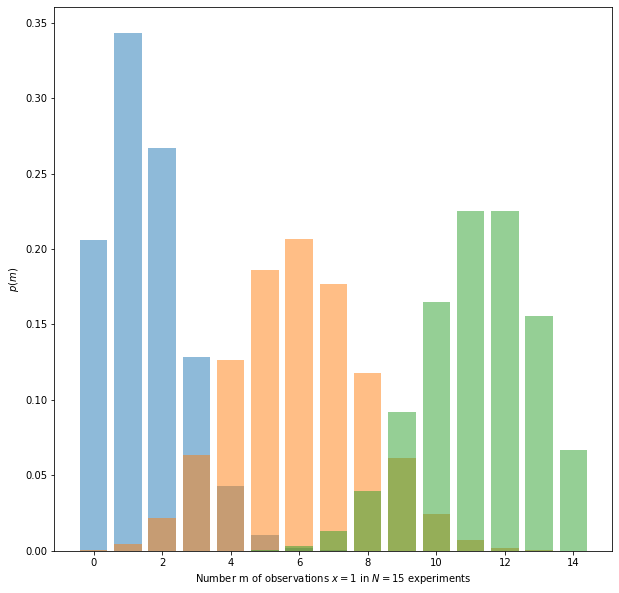

In [49]:
x = np.arange(binom.ppf(.01,N,means[0]),
              binom.ppf(.99,N,means[2]))
[plt.bar(x,binom.pmf(x,N,means[i]), alpha = .5) for i in range(0,3)]
plt.xlabel(r"Number m of observations $x=1$ in $N = 15$ experiments")
plt.ylabel(r"$p(m)$");

BETA DISTRIBUTION

In [50]:
from scipy.stats import beta

In [51]:
alphas = np.vstack([.5,1,2,4,5])
betas = np.vstack([.5,1,.3,10,1])
ab = np.hstack([alphas,betas])
Matrix(ab)

Matrix([
[0.5,  0.5],
[1.0,  1.0],
[2.0,  0.3],
[4.0, 10.0],
[5.0,  1.0]])

In [52]:
beta.pdf(xs,ab[0][0],ab[0][1])

array([inf,  0.,  0.,  0.,  0.])

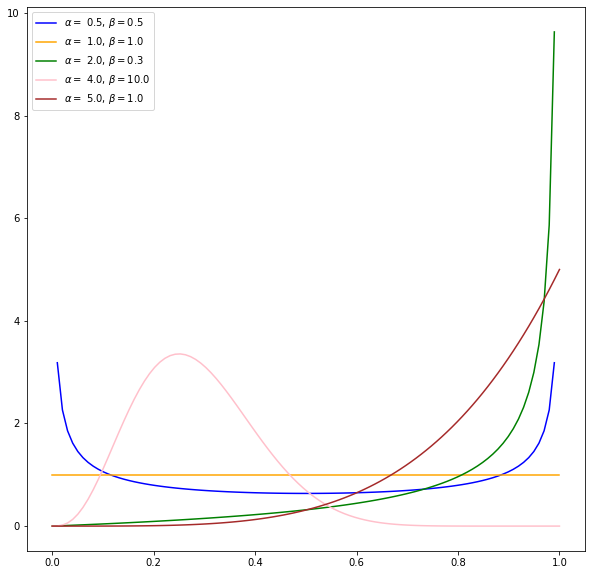

In [53]:
xs = np.linspace(0,1,100)
colors = ["b","orange","g","pink","brown"]
for ind,i in enumerate(ab):
    plt.plot(xs,beta.pdf(xs,i[0],i[1]), c = colors[ind], label = r"$\alpha =$ %1.1f, " %i[0] + r"$\beta = %1.1f.$" %i[1])
plt.legend();

BETA - BINOMIAL CONJUGACY

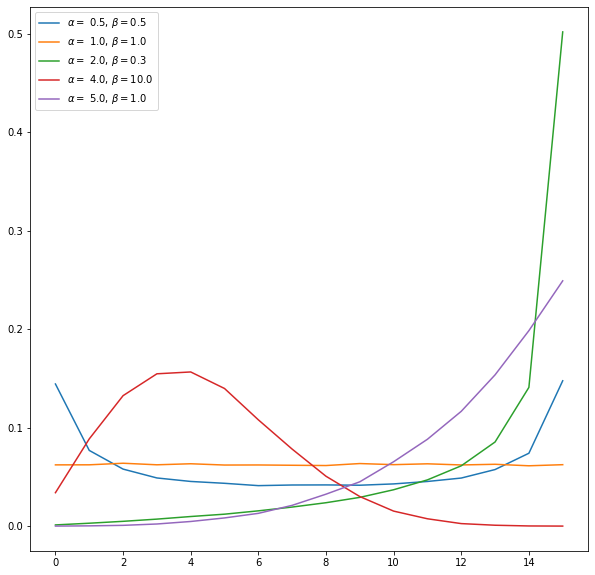

In [54]:
def betabinom(a, b, n, size=None):
    p = np.random.beta(a, b, size=size)
    r = np.random.binomial(n, p)

    return r

N = 15
n = 100000

for i in ab:
    q = betabinom(i[0], i[1], N, size=n)
    # Building histogram heights.
    h = np.zeros(N+1, dtype=np.float64) 
    for v in q: 
        h[v] += 1.0
    h /= np.float64(n) 
    # Building histogram heights.
    plt.plot(np.linspace(0,N,len(h)), h, label = r"$\alpha =$ %1.1f, " %i[0] + r"$\beta = %1.1f.$" %i[1])
plt.legend();

INVERSE TRANSFORM

In [55]:
x = Symbol('x')
f = 3*x**2
fLam = lambdify('x',f)
f

3*x**2

In [56]:
y = Symbol('y')
Fy = y**(3/2)
FyLam = lambdify('y',Fy)
Fy

y**1.5

In [57]:
diff(Fy)

1.5*y**0.5